# Introduction
The general theme of today is to answer a simple question, is my hypothesis correct?  

Today we will focus on an easily simulated problem, the biased coin.

First lets import some packages we will need into the notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

Now we can set up a function which will "flip a coin" $N$ times to give us our data set.  We will choose how fair the coin is as an input parameter, bias and also the number of tosses.  We can plot the distribution this gives us.

In [2]:
def random_coin_toss(n_tosses, bias):
    """
    function to compute a number of random coin tosses 
    with a biased coin
    
    Parameters
    ----------
        n_tosses int: number of tosses of the coin
        bias float[0,1]: bias of the coin
        
    Returns
    -------
       list of 0,1 values of length n_tosses where each value is chosen
       uniformly from [0,1] and compared against bias
    """

    return [1 if i > bias else 0 for i in np.random.rand(n_tosses)]

We can run an experiment where we we toss the coin ten thousand times for a few different biases and look at the probability of getting both heads and tails.  We can see that it is reasonably close to what we would expect.

*Question* : What would happen if we tossed the coin more?  Less?

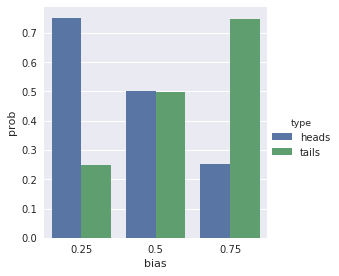

In [3]:
result = []
N = 10000
for bias in [.25,.5,.75]:
    tosses = random_coin_toss(N, bias)
    num_heads = len([i for i in tosses if i])
    result.append({'prob':num_heads/N,
                   'type':'heads',
                   'bias':bias})
    result.append({'prob':1-num_heads/N,
                  'type':'tails',
                  'bias':bias})
sns.factorplot(x='bias',y='prob',hue='type',
               data=pd.DataFrame(result),
               kind='bar')

So now we can ask the question, given a coin which may or may not be biased can we tell if it is biased or not?  Intuitively, if the coin is quite biased, this should be easier than if it is only slightly biased.  Of course we will generate all the data ourselves, so we can check easily check the accuracy of our results.

Our first two tests will make use of statistics know as the p-value and

So lets say we have flipped a coin $N$ times and computed the mean value of these flips.  If $N$ is small, we expect that if we repeated these flips again $M$ times, we would have quite a large variation in our results, if $N$ is large, we expect it to be less so.

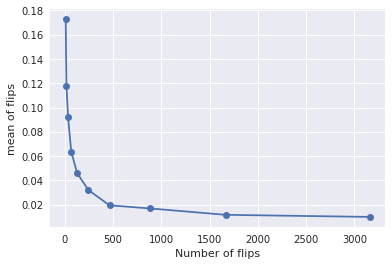

In [4]:
n_list = np.logspace(1, 3.5, 10).astype(int)
std_list = []
for N in n_list:
    flip_means = np.zeros(100)
    for i in range(100):
        flip_means[i] = np.mean(random_coin_toss(N, .5))
    std_list.append(np.std(flip_means))
plt.plot(n_list, std_list,'o-')
plt.xlabel('Number of flips')
plt.ylabel('mean of flips')

This is brings us to the *null hypothesis* which in general is the hypothesis that the data does not deviate from the expected result (or is not extreme) in this case, the null hypothesis is that the coin is fair.  We cna

In [5]:
str_="""index                 | bigint                |           | plain    |              | 
 YEAR                  | bigint                |           | plain    |              | 
 QUARTER               | bigint                |           | plain    |              | 
 MONTH                 | bigint                |           | plain    |              | 
 DAY_OF_MONTH          | bigint                |           | plain    |              | 
 DAY_OF_WEEK           | bigint                |           | plain    |              | 
 FL_DATE               | character varying(10) |           | extended |              | 
 UNIQUE_CARRIER        | character varying(2)  |           | extended |              | 
 AIRLINE_ID            | bigint                |           | plain    |              | 
 CARRIER               | character varying(2)  |           | extended |              | 
 TAIL_NUM              | character varying(6)  |           | extended |              | 
 FL_NUM                | bigint                |           | plain    |              | 
 ORIGIN_AIRPORT_ID     | bigint                |           | plain    |              | 
 ORIGIN_AIRPORT_SEQ_ID | bigint                |           | plain    |              | 
 ORIGIN_CITY_MARKET_ID | bigint                |           | plain    |              | 
 DEST_AIRPORT_ID       | bigint                |           | plain    |              | 
 DEST_AIRPORT_SEQ_ID   | bigint                |           | plain    |              | 
 DEST_CITY_MARKET_ID   | bigint                |           | plain    |              | 
 CRS_DEP_TIME          | bigint                |           | plain    |              | 
 DEP_TIME              | double precision      |           | plain    |              | 
 DEP_DELAY             | double precision      |           | plain    |              | 
 DEP_DELAY_NEW         | double precision      |           | plain    |              | 
 DEP_DEL15             | double precision      |           | plain    |              | 
 DEP_DELAY_GROUP       | double precision      |           | plain    |              | 
 DEP_TIME_BLK          | character varying(9)  |           | extended |              | 
 TAXI_OUT              | double precision      |           | plain    |              | 
 WHEELS_OFF            | double precision      |           | plain    |              | 
 WHEELS_ON             | double precision      |           | plain    |              | 
 TAXI_IN               | double precision      |           | plain    |              | 
 CRS_ARR_TIME          | bigint                |           | plain    |              | 
 ARR_TIME              | double precision      |           | plain    |              | 
 ARR_DELAY             | double precision      |           | plain    |              | 
 ARR_DELAY_NEW         | double precision      |           | plain    |              | 
 ARR_DEL15             | double precision      |           | plain    |              | 
 ARR_DELAY_GROUP       | double precision      |           | plain    |              | 
 ARR_TIME_BLK          | character varying(9)  |           | extended |              | 
 CANCELLED             | double precision      |           | plain    |              | 
 CANCELLATION_CODE     | character varying(1)  |           | extended |              | 
 DIVERTED              | double precision      |           | plain    |              | 
 CRS_ELAPSED_TIME      | double precision      |           | plain    |              | 
 ACTUAL_ELAPSED_TIME   | double precision      |           | plain    |              | 
 AIR_TIME              | double precision      |           | plain    |              | 
 FLIGHTS               | double precision      |           | plain    |              | 
 DISTANCE              | double precision      |           | plain    |              | 
 DISTANCE_GROUP        | bigint                |           | plain    |              | 
 CARRIER_DELAY         | double precision      |           | plain    |              | 
 WEATHER_DELAY         | double precision      |           | plain    |              | 
 NAS_DELAY             | double precision      |           | plain    |              | 
 SECURITY_DELAY        | double precision      |           | plain    |              | 
 LATE_AIRCRAFT_DELAY   | double precision      |           | plain    |              | 
 FIRST_DEP_TIME        | double precision      |           | plain    |              | 
 TOTAL_ADD_GTIME       | double precision      |           | plain    |              | 
 LONGEST_ADD_GTIME     | double precision      |           | plain    |              | 
 Unnamed: 52           | double precision      |           | plain 
 """

In [17]:
parsed = [[j.strip() for j in i.split('|')[:2]] for i in str_.split('\n')][:-1]
def di(x):
    d = {'bigint':'db.Integer','double precision':'db.Float'}
    try:
        return d[x]
    except:
        return 'db.String(255)'
for i in parsed:
    print("{} = db.Column({})".format(i[0], di(i[1])))

index = db.Column(db.Integer)
YEAR = db.Column(db.Integer)
QUARTER = db.Column(db.Integer)
MONTH = db.Column(db.Integer)
DAY_OF_MONTH = db.Column(db.Integer)
DAY_OF_WEEK = db.Column(db.Integer)
FL_DATE = db.Column(db.String(255))
UNIQUE_CARRIER = db.Column(db.String(255))
AIRLINE_ID = db.Column(db.Integer)
CARRIER = db.Column(db.String(255))
TAIL_NUM = db.Column(db.String(255))
FL_NUM = db.Column(db.Integer)
ORIGIN_AIRPORT_ID = db.Column(db.Integer)
ORIGIN_AIRPORT_SEQ_ID = db.Column(db.Integer)
ORIGIN_CITY_MARKET_ID = db.Column(db.Integer)
DEST_AIRPORT_ID = db.Column(db.Integer)
DEST_AIRPORT_SEQ_ID = db.Column(db.Integer)
DEST_CITY_MARKET_ID = db.Column(db.Integer)
CRS_DEP_TIME = db.Column(db.Integer)
DEP_TIME = db.Column(db.Float)
DEP_DELAY = db.Column(db.Float)
DEP_DELAY_NEW = db.Column(db.Float)
DEP_DEL15 = db.Column(db.Float)
DEP_DELAY_GROUP = db.Column(db.Float)
DEP_TIME_BLK = db.Column(db.String(255))
TAXI_OUT = db.Column(db.Float)
WHEELS_OFF = db.Column(db.Float)
WHEELS_ON = db.